# LGM VIP Data Science

June 2022

02 INTERMEDIATE LEVEL TASK  - 01 Exploratory Data Analysis on Dataset - Terrorism

Name - Praveen jha

In [1]:
import numpy as np  # for numeric calulations 
import pandas as pd   # to handle data structues opreations
import matplotlib.pyplot as plt  # for graph and plots
import seaborn as sns  # for visulisations
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import missingno as ms # for missing value visulations

In [2]:
terrorism_df = pd.read_csv(r"globalterrorismdb_0718dist.csv",encoding='latin1')

In [3]:
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terrorism_df.shape

(181691, 135)

In [5]:
print("the number of columns in  the terrorism data set ")
terrorism_df.columns.to_list()

the number of columns in  the terrorism data set 


['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [6]:

terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'country_txt':'Country','provstate':'state',
                         'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
terrorism_df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
terrorism_df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
'Important columns'
terrorism_df = terrorism_df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
                      'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terrorism_df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
terrorism_df.shape

(181691, 18)

In [11]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [12]:
print('Number of duplicated value existed  in data is ',terrorism_df.duplicated().sum(),'.')

Number of duplicated value existed  in data is  9498 .


In [13]:
'''Checking the missing value'''
terrorism_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [14]:
'''Percentage of missing value of each features'''
terrorism_df.isnull().sum()/terrorism_df.count()*100

Year             0.000000
Month            0.000000
Day              0.000000
Country          0.000000
state            0.232250
Region           0.000000
city             0.239439
latitude         2.572050
longitude        2.572629
AttackType       0.000000
Killed           6.017692
Wounded          9.862740
Target           0.351274
Summary         57.223828
Group            0.000000
Target_type      0.000000
Weapon_type      0.000000
Motive         259.350092
dtype: float64

Text(0.5, 1.0, 'Matrix Plot')

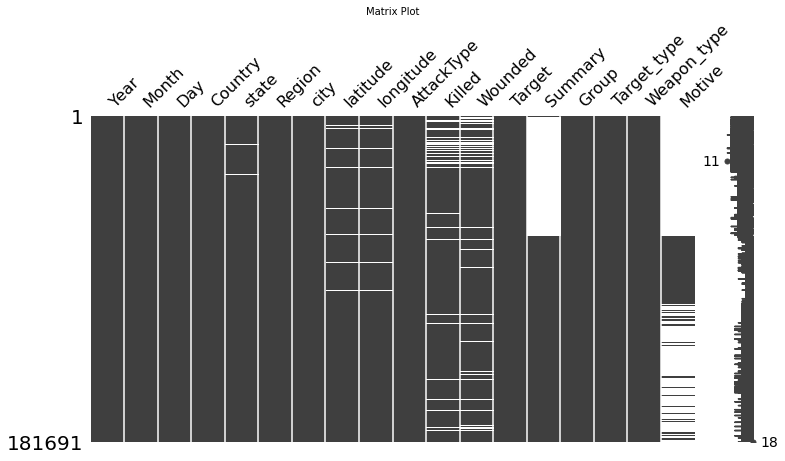

In [15]:
ms.matrix(terrorism_df,figsize=(12,6))
plt.title('Matrix Plot',size=10)

Text(0.5, 1.0, 'Bar Plot')

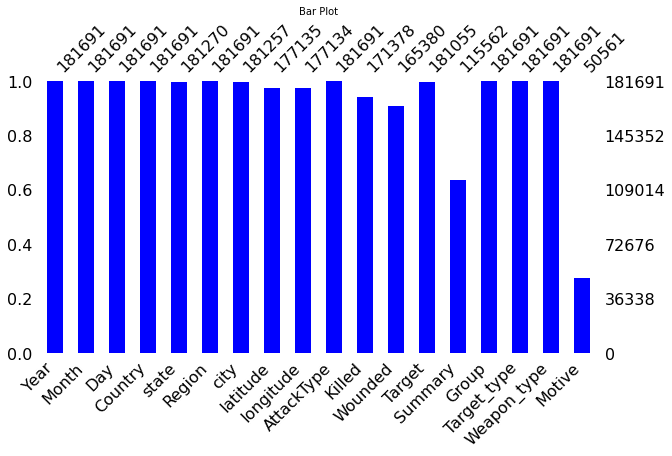

In [16]:
ms.bar(terrorism_df,figsize=(10,5), color='blue')
plt.title('Bar Plot', size=10)

In [17]:
'''Most Attack '''

print('Country with the most attack', terrorism_df['Country'].value_counts().idxmax())
print('state with the most attack', terrorism_df['state'].value_counts().idxmax())
print('Region with the most attack', terrorism_df['Region'].value_counts().idxmax())
print('city with the most attack', terrorism_df['city'].value_counts().index[1])
print('Year with the most attack', terrorism_df['Year'].value_counts().idxmax())
print('Most attack Type', terrorism_df['AttackType'].value_counts().idxmax())
print('Group with the most attack', terrorism_df['Group'].value_counts().index[1])

Country with the most attack Iraq
state with the most attack Baghdad
Region with the most attack Middle East & North Africa
city with the most attack Baghdad
Year with the most attack 2014
Most attack Type Bombing/Explosion
Group with the most attack Taliban


In [18]:
terrorism_df['Year'].value_counts(dropna=False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

In [19]:
terrorism_df['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

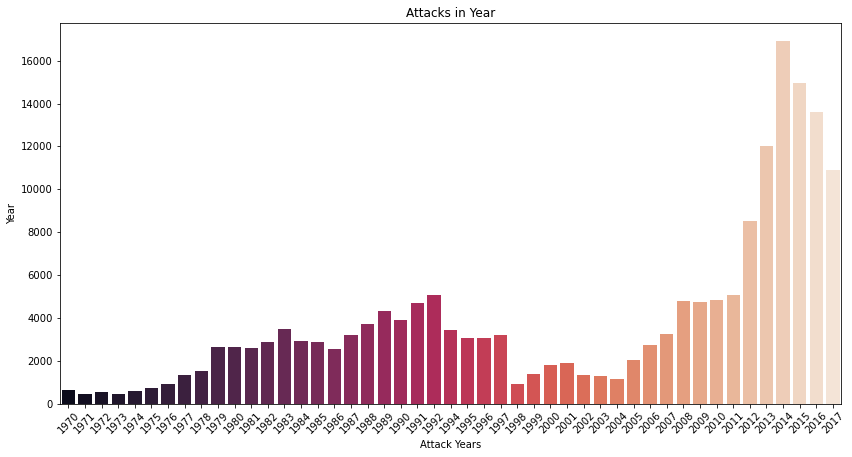

In [20]:
'''Barlot'''

x_year = terrorism_df['Year'].unique()
y_year = terrorism_df['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(14,7))
plt.title('Attacks in Year')
plt.xlabel('Attack Years')
plt.ylabel('Number of Attacks each years')
sns.barplot(x_year,y_year, palette='rocket')
plt.xticks(rotation=45)
plt.show

In [21]:
terrorism_df['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

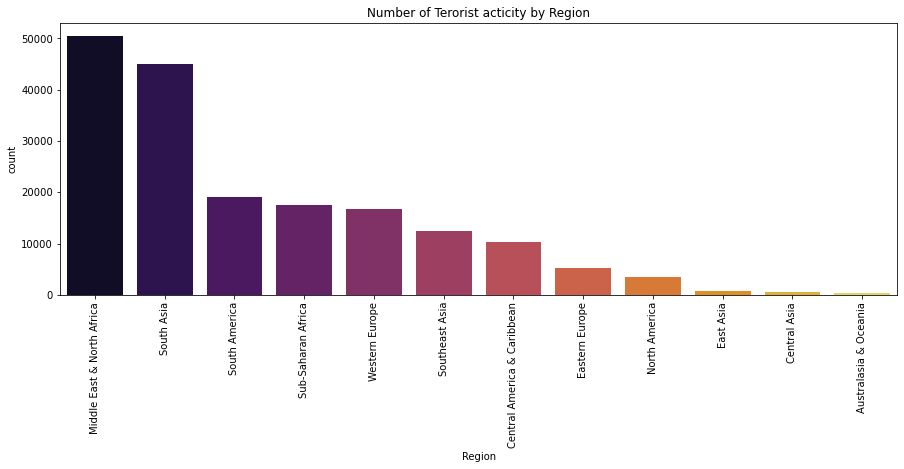

In [22]:
'''Number of Terrorist acticity by Region'''
plt.subplots(figsize=(15,5))
sns.countplot('Region',data=terrorism_df,palette='inferno',order=terrorism_df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.title('Number of Terorist acticity by Region')
plt.show()

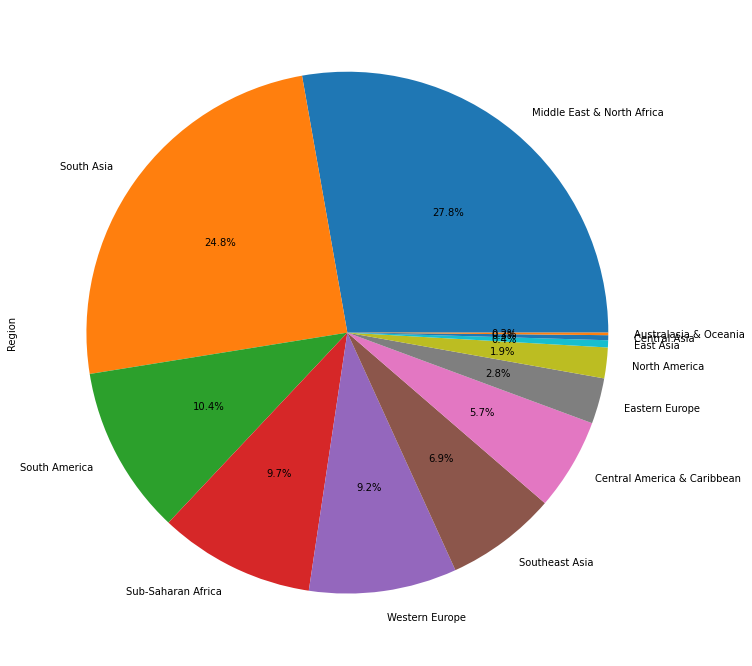

In [23]:
'''Pie plot of Region'''
plt.figure(figsize=(12,12))
terrorism_df['Region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [24]:
attack_country = terrorism_df.Country.value_counts()[:15]
attack_country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

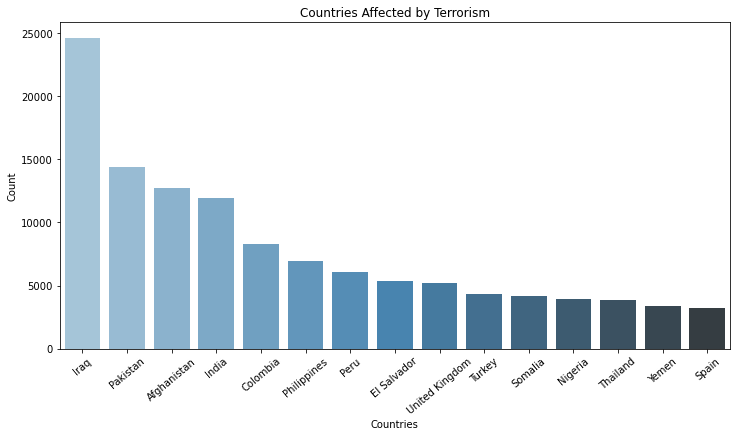

In [25]:
'''Countries affected by terrorism'''
plt.subplots(figsize=(12,6))
sns.barplot(attack_country.index,attack_country.values,palette='Blues_d')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=40)
plt.title('Countries Affected by Terrorism')
plt.show()

In [26]:
attack_groups = terrorism_df.Group.value_counts()[1:15]
attack_groups

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

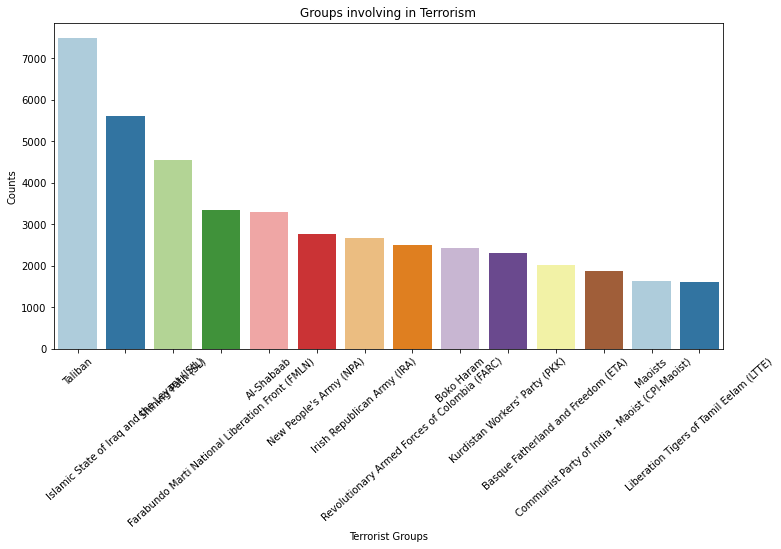

In [27]:
'''Groups involving in terrorism'''

plt.subplots(figsize=(12,6))
sns.barplot(attack_groups.index,attack_groups.values,palette=('Paired'))
plt.xlabel('Terrorist Groups')
plt.ylabel('Counts')
plt.xticks(rotation=42)
plt.title('Groups involving in Terrorism')
plt.show()

In [28]:
attack_type = terrorism_df.AttackType.value_counts()[:15]
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

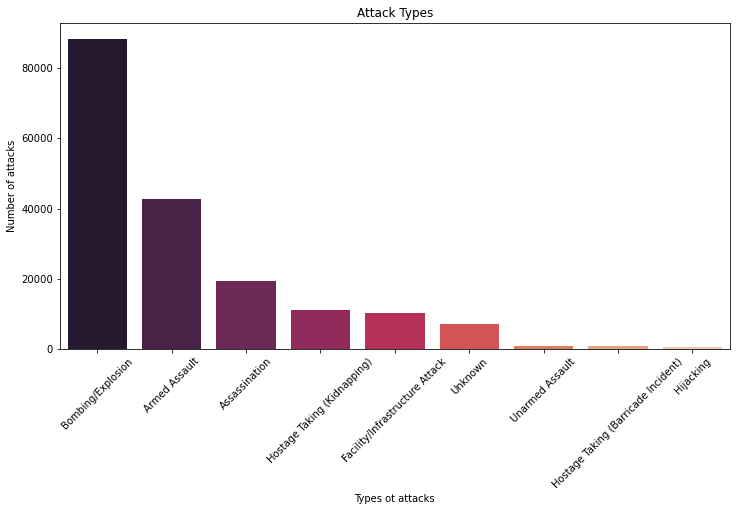

In [29]:
'''Attack types '''
plt.subplots(figsize=(12,6))
sns.barplot(attack_type.index,attack_type.values,palette="rocket")
plt.title('Attack Types')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 45)
plt.show()

In [30]:
attack_wounded = terrorism_df[['AttackType','Wounded']].groupby(["AttackType"],axis=0).sum()
attack_wounded

,Wounded
AttackType,
Armed Assault,77366.0
Assassination,13887.0
Bombing/Explosion,372686.0
Facility/Infrastructure Attack,3765.0
Hijacking,17001.0
Hostage Taking (Barricade Incident),3966.0
Hostage Taking (Kidnapping),6446.0
Unarmed Assault,14027.0
Unknown,14725.0


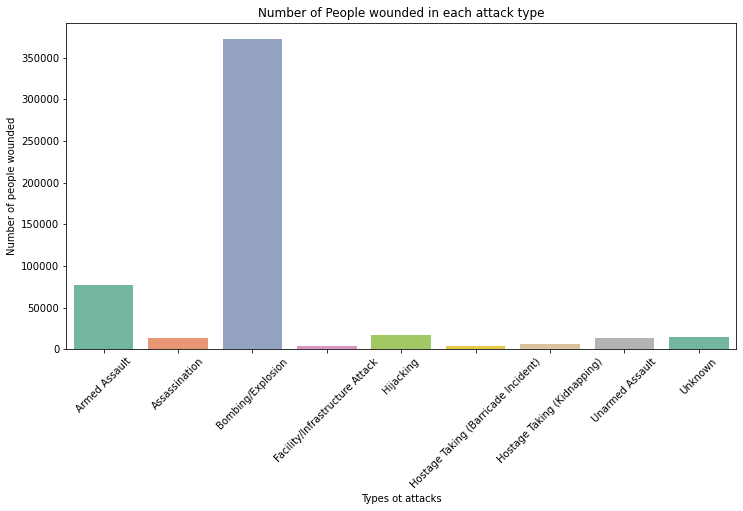

In [31]:
'''People Wounded in each attack type'''
plt.subplots(figsize=(12,6))
sns.barplot(attack_wounded.index, attack_wounded.Wounded.values,palette= "Set2")
plt.title('Number of People wounded in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people wounded')
plt.xticks(rotation= 45)
plt.show()